In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

%matplotlib inline


document = pd.read_csv('input/Indicators.csv')


Objective : plot on same graph unemployment in france Male VS female
later plot France Germany Switzerland UK unemployment on same graph

In [2]:
France_UEM_FEM = document.query("CountryCode == 'FRA'   & IndicatorCode == 'SL.UEM.1524.FE.NE.ZS'")
France_UEM_MA = document.query("CountryCode == 'FRA'   & IndicatorCode == 'SL.UEM.1524.MA.NE.ZS'")

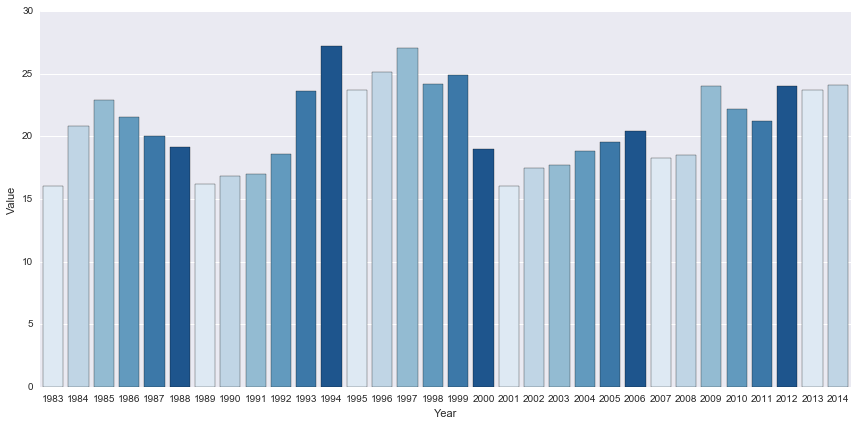

In [3]:
France_UEM_FEM = France_UEM_FEM[["Year","Value"]]
France_UEM_MA = France_UEM_MA[["Year","Value"]]
sns.factorplot("Year","Value",data=France_UEM_MA, size=6, aspect=2,kind="bar",palette=sns.color_palette("Blues"))

In [4]:
France_UEM_FEM.index=France_UEM_FEM["Year"]
France_UEM_FEM.drop("Year",axis=1,inplace=True)
France_UEM_MA.index=France_UEM_MA["Year"]
France_UEM_MA.drop("Year",axis=1,inplace=True)

In [ ]:
#France_UEM_FEM.plot(legend=True,figsize=(10,4),ylim=(0,100),color ='r')


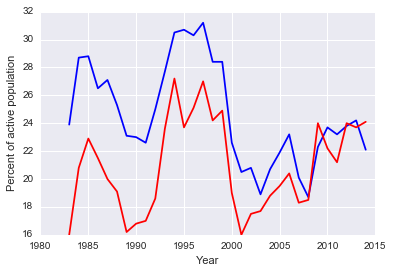

In [21]:
plt.plot(France_UEM_FEM,color ='b')
plt.plot(France_UEM_MA,color ='r')
plt.ylabel('Percent of active population')
plt.xlabel('Year')

In [7]:
test = France_UEM_FEM.unstack()
test2 = France_UEM_MA.unstack()

In [10]:
dframe = pd.concat([test,test2])
dframe.shape

(64,)